In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('titanic.csv')

# EDA

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.size

10692

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 
1. This data set has 890 rows and 12 columns.
2. Most of the columns has numeric data types.
3. There are also some columns with object data types which is arbitrary datatype.
4. We can also see that there are some Nan values columns like Age, Cabin, Embarked.

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Visualization

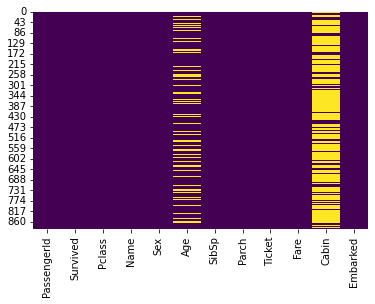

In [10]:
sns.heatmap(df.isnull(), cmap="viridis",cbar=False);

<AxesSubplot:xlabel='Survived', ylabel='count'>

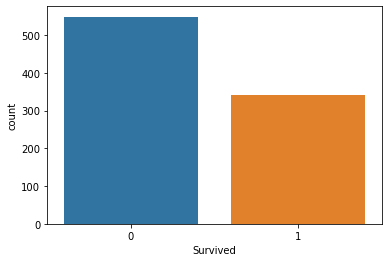

In [11]:
# What is the survival rate of titanic
sns.countplot(data=df, x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

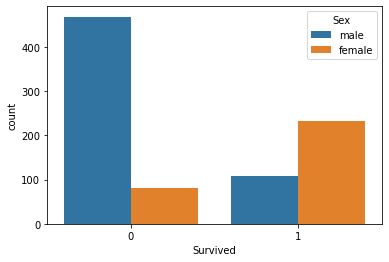

In [12]:
sns.countplot(data=df, x="Survived", hue="Sex")

<AxesSubplot:xlabel='Survived', ylabel='count'>

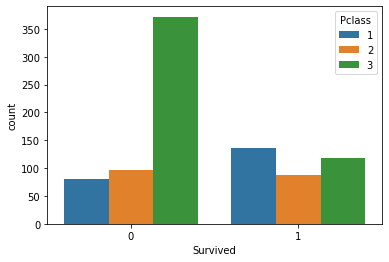

In [13]:
sns.countplot(data=df, x="Survived", hue="Pclass")

<AxesSubplot:xlabel='Fare', ylabel='Density'>

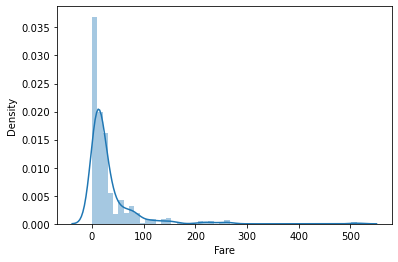

In [14]:
# Right skewed
sns.distplot(df["Fare"])

<AxesSubplot:xlabel='Age', ylabel='Density'>

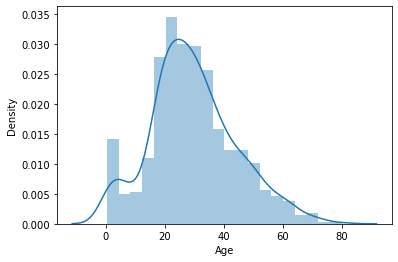

In [15]:
# Right skewed
sns.distplot(df["Age"])

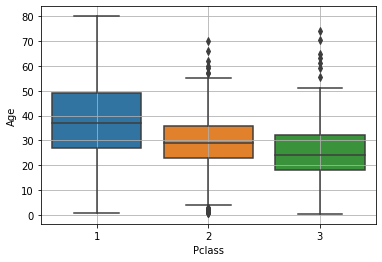

In [16]:
sns.boxplot(data=df, x="Pclass", y="Age")
plt.grid(True)

In [17]:
def fillage(cols):
  age=cols[0]
  pclass=cols[1]

  if(pd.isnull(age)):
    if(pclass==1):
      return 38
    elif(pclass==2):
      return 29
    else:
      return 24
    
  else:
    return age

In [18]:
df["Age"]=df[["Age","Pclass"]].apply(fillage, axis=1)

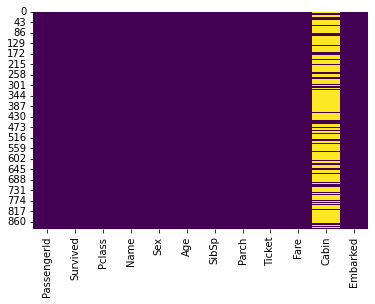

In [19]:
sns.heatmap(df.isnull(), cmap="viridis",cbar=False);

In [20]:
df.drop("Cabin",axis=1, inplace=True)

In [21]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
df=df.drop(["PassengerId", "Name", "Ticket"],axis=1)

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Converting text value into Numerical value

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [30]:
le = LabelEncoder()
ohe= OneHotEncoder()
oe= OrdinalEncoder()

In [31]:
ohe.fit_transform(df[["Sex", "Embarked"]]).toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [32]:
ohe.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [33]:
oe.fit_transform(df[["Sex","Embarked"]])

array([[1., 2.],
       [0., 0.],
       [0., 2.],
       ...,
       [0., 2.],
       [1., 0.],
       [1., 1.]])

# Model Creation

In [37]:
from sklearn.preprocessing import StandardScaler
# define StandScaler scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [38]:
X=df.iloc[:,1:] 
y=df.iloc[:,0]

In [39]:
from sklearn.compose import ColumnTransformer

In [40]:
ct= ColumnTransformer(
    transformers=[
                 ("encoder",
                  OrdinalEncoder(),
                  ["Sex","Embarked"]
                 )
                 ],
                 remainder="passthrough"
)
ct.fit_transform(X)
X =ct.fit_transform(X)

# KNN 

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1) 

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
train = knn.score(X_train, y_train)
test = knn.score(X_test, y_test)


print("Training Score :", {train})
print("Testing Score :", {test})

Training Score : {0.7813504823151125}
Testing Score : {0.6891385767790262}


#
In KNN, there is low bias and high variance. Hence It is Overfitting.

In [46]:
trainac = []
testac = []

for i in range(1,31):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)

  trainac.append(knn.score(X_train, y_train))
  testac.append(knn.score(X_test, y_test))

In [47]:
dic = {
    "n":np.arange(1,31),
    "train":trainac,
    "test":testac
}

hp = pd.DataFrame(dic)
hp

,n,train,test
0,1,0.983923,0.700375
1,2,0.823151,0.670412
2,3,0.842444,0.692884
3,4,0.787781,0.670412
4,5,0.781350,0.689139
5,6,0.763666,0.662921
6,7,0.763666,0.674157
7,8,0.754019,0.681648
8,9,0.758842,0.666667
9,10,0.745981,0.670412


In [48]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.77       166
           1       0.63      0.51      0.57       101

    accuracy                           0.70       267
   macro avg       0.68      0.67      0.67       267
weighted avg       0.70      0.70      0.70       267



# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [55]:
df.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

In [57]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

train = logreg.score(X_train, y_train)
test = logreg.score(X_test, y_test)

print(f"Training score : {train}")
print(f"Testing score : {test}")

y_pred = logreg.predict(X_test)

Training score : 0.8038585209003215
Testing score : 0.8052434456928839


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       165
           1       0.76      0.73      0.74       102

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267



# SVM

In [59]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       165
           1       0.72      0.32      0.45       102

    accuracy                           0.69       267
   macro avg       0.70      0.62      0.62       267
weighted avg       0.70      0.69      0.66       267



In [61]:
train = svm.score(X_train, y_train)
test = svm.score(X_test, y_test)


print(f"Training score : {train}")
print(f"Testing score : {test}")

Training score : 0.6752411575562701
Testing score : 0.6928838951310862


In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       165
           1       0.85      0.71      0.77       102

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.84       267

